## 机器学习与线性代数
自打我开始学习机器学习的相关知识以来，线性代数就一直是制约我读懂算法的最大短板。尽管经过大概两个月的学习，我的代数知识积累似乎已经足以让我不害怕任何数学推导了，但是毕竟是将来要赖以生存的本领，如果有一天忘记了它们我会很sad的。所以这里我还是决定整理一下与机器学习相关的所有数学知识，方便随时查阅，杜绝忘却。  
笔记将以花书《深度学习》为思维导向，从底到上梳理各种可能用到的数学知识。

### 代数的运算律
和标量类似的运算律有分配律、结合律，而一般不满足交换律，因为代数是有维度的。  
$$ AB \neq BA \qquad exp: (2x3)\times (3x2) = (2x2) \quad but \quad (3x2)\times (2x3) = (3x3) $$
此外代数可以转置，也就是沿对角线反转矩阵。代数乘积的转置满足
$$ (AB)^T  = B^TA^T $$
### 迹
$$Tr(A) = \sum_iA_{i,i}$$
只看这个定义看不出什么，体验它的作用还是在实践中。它有着非常好用的交换律，即使两个矩阵一个是nxn一个是mxm
$$ Tr(AB) = Tr(BA)$$
### 范数
范数可以把向量映射为非负标量
$$ ||x||_p = (\sum_i|x_i|^p)^{\frac{1}{p}} $$
范数常用来评估高维空间中的距离，经典的应用就是正则化和聚类。常用的范数有L1范数，即曼哈顿距离，L2范数即欧几里得距离，有时还会使用Linf范数，即计算向量中最大幅值元素的绝对值。
### 矩阵逆
单位矩阵一般写成$I$，是对角线元素为1其他为0的方阵。为此我们有矩阵的逆矩阵的定义
$$ A^{-1}A = I $$
做题和考试时求矩阵逆我们可能会采取手算的方法，就是通过多次基本矩阵变换把A变成I，这是同样把这些操作施加于单位矩阵上，就得到逆矩阵。矩阵可逆的条件是矩阵正定，即矩阵中不存在线性相关项。同时，单位正交矩阵的逆矩阵就是它自己的转置。
### 特征值分解
应某些问题需要，我们经常会用到矩阵对角化的运算。对一个方阵B，我们希望得到
$$ B = P^{-1}AP $$
其中A是对角矩阵，即对角线上的元素非零其他为零。而P是单位正交矩阵，单位正交矩阵的每一列对应的列向量都是单位向量，且两两正交。也就是满足
$$ diag(A) = \{\lambda_1,...,\lambda_n\} $$
$$ P^TP = I $$
这样的矩阵分解方法也可以写成多个向量外积的加和
$$ B = \lambda_1 p_1p_n^T+...+\lambda_np_np_n^T $$
这种分解得到的对角矩阵中的标量称为特征值，每个特征值都会对应一个特征向量。一般的矩阵不一定能对角化，但是对称矩阵一定可以对角化。正定矩阵的特征值都是非负的。
### 行列式
计算大家都懂，它会得到矩阵所有特征值的乘积。
### SVD分解
我们不能对一般的矩阵(不一定是方阵)进行对角化，但是我们可以用一些运算构造出能分解的对称矩阵。
$M = A^TA$为对称正定矩阵，因为
$$ (A^TA)^T = A^T(A^T)^T = A^TA $$
$$ x^TA^TAx = (x^TA^T)(Ax) = (Ax)^T(Ax) \ge 0$$
很容易看出，M的转置仍然是自己，且不论是用怎样的特征向量，得到的$\lambda$特征值都是非负数。这样我们就能对这个$A^TA$进行SVD分解
$$ (A^TA)_{nxn} = U^TDU $$
$$ (AA^T)_{mxm} = V^TDV $$
两个矩阵分解得到的中间的对角矩阵，也就是得到的特征值相同。
$$ A_{mxn}=V^T_{mxm}diag(\{\lambda_1^{\frac{1}{2}},...\lambda_n^{\frac{1}{2}}\})U^T_{nxn} $$
$$ A_{mxn}=\lambda_1^{\frac{1}{2}}v_1u_1^T+...+\lambda_n^{\frac{1}{2}}v_nu_n^T$$
这样就能对任意的矩阵进行奇异值的分解。得到的对角矩阵中的标量称为奇异值，左侧矩阵的向量称为左奇异向量，右侧称为右奇异向量。  
SVD分解和特征值分解都常被用作矩阵的压缩保存，我们可以不保存所有特征向量，只保存一部分特征向量来重构原矩阵。

### 应用:线性回归
我们在学习线性代数时知道用矩阵方法求解线性方程组，事实上对于一个线性方程组$A_{nxn}x=y$，我们完全可以用$x = A^{-1}y$来计算线性方程组的解。当然A可逆的条件是A为方阵且A中的每个行向量线性无关，也就是A正定。但是实际使用中我们并不会有那么好的运气，在做线性回归时，我们的数据集的有效数据个数rank和数据维度m不总是相等的。当rank大于m时线性方程组无解，当rank小于m时方程组有无穷个解。解决这个问题的简单方法是使用伪逆。  
我们将不追求得到尽善尽美的解，而是追求最小化均方误差$||Ax-y||_2$。这种凸优化问题，我们只需要对均方误差求导就能得到最小化误差的解。
$$ L = (Ax-y)^T(Ax-y) $$
$$ \frac{\partial L}{\partial x} = 2A^T(Ax-y)=0 $$
这时得到的解是
$$ x = (A^TA)^{-1}A^Ty $$
当A矩阵像上面的列数m多于行数n，则上面的方法并不能得到好的解，因为这时A的秩(最大线性无关行的个数)不会大于n，而n<m，对mxm的方阵我们是无法求逆的。这时我们需要引入L2正则化项让A可逆，我们把上面的损失函数改成$||Ax-y||_2+\lambda ||\alpha x ||^2$
$$ x = lim_{\alpha \rightarrow 0}(A^TA+\alpha I)^{-1}A^Ty $$
这时就可以求逆了，可以直观地理解，我们在每个向量$v_m$的第m维加上了一点点的增量，这样即使原本线性相关的向量也会被变成线性无关。这样，我们就能对任意的A求解一个线性方程组近似解，也就是线性回归解。  
上面的这个$(A^TA+\alpha I)^{-1}A^T$又叫伪逆$A^+$，我们一般会用奇异值分解帮助我们计算伪逆。即$A^+ = VD^+U^T$，对角矩阵D的伪逆就是对D的非零元素取倒数再转置。如果我们用伪逆在数据集上进行线性回归，得到的解会让欧几里得距离，也就是上面的损失函数最小。同时如果引入正则化项，还能在m多于rank时，从无穷个解中找到最小范数的解x。

### 实例:小车初速度与加速度测定
我们在物理实验中会让小车在光滑平面上运动, 通过记录时间和路程构成的多个数据点并做数据分析, 得到小车实际的初速度和加速度. 这个过程实际上是一个线性回归, 我们知道路程-时间公式可以写成
$$ s = s_0+v_0 t+a t^2 $$
那么问题实际上是一个三元的线性回归, 变量分别是$1$, $t$, $t^2$, 我们把三元数据和路程做线性回归, 就能得到一个权值向量x, 它的三个维度的意义就是上面的$s_0,v_0,a$. 

In [3]:
import numpy as np

# 小车斜面下落实验, 加速度为4.9, 初速度2, 初始路程1
t = np.linspace(0, 2, 8)
s = 1 + 2*t + 4.9*t**2
# 加一些噪声,可以理解为实验中的测量误差
s += np.random.randn(*s.shape)*0.01


# 构造数据的三元矩阵
A = np.concatenate([np.ones(t.shape).reshape(1,-1),
                    t.reshape(1,-1),
                    (t**2).reshape(1,-1)]).T

# 计算线性回归的权值向量x
x = np.linalg.pinv(A).dot(s)
print("Displacement: %.4f"%(x[0]))
print("Initial velocity: %.4f"%(x[1]))
print("Acceleration: %.4f"%(x[2]))

[0.28571429 0.57142857 0.85714286 1.14285714 1.42857143 1.71428571
 2.        ]
[ 1.96842498  3.73952499  6.34006324  9.68106816 13.87408878 18.81316696
 24.59983194]
Displacement: 1.0105
Initial velocity: 1.9969
Acceleration: 4.8980


### 应用:PCA
其实PCA我之前做过蛮多次推导了，这里再写一次加深记忆。  
我们希望通过一个线性变换，把现有的数据集$X_{nxm}$通过变换矩阵$W_{mxd}$变换到d维，从而实现数据降维的需要。这个W要满足正交基的性质，即$W^TW=I$，是单位正交矩阵。  
为了实现"变换后的数据丢失尽可能少的信息"，我们会定义一个损失函数，让这些降维后的数据点分得尽可能开。这个损失函数就设定为变换后数据集的方差，我们希望最大化方差。为了处理起来简便，我们在一开始就把X标准化处理，让它的均值为零，那么降维后的均值$\mu=0$。
$$ E(W) = \sum_i^n||x_iW-\mu||_2^2= \sum_i^n||x_iW||_2^2$$
这个损失函数可以用上面迹的定义写成非常好看的矩阵乘法形式
$$ E(W) = tr[(XW)(XW)^T] $$
加上上面的W单位正交条件，这个问题是一个约束优化问题，最优解一定满足KKT条件。构造出拉格朗日函数，设$\lambda $是拉格朗日乘子的d维行向量。我们有
$$ L(W) = E(W)+\lambda tr(W^TW-I) = tr[(XW)(XW)^T] -\lambda tr(W^TW-I)$$
$$ \frac{\partial L}{\partial W} = 2X^T(XW)-2\lambda W = 0 \rightarrow X^TXW = \lambda W $$
这说明W中的每个向量都满足$X^TXw_i = \lambda_iw_i$的条件，也就是，W中的每个向量都是$X^TX$的特征向量。但是特征向量可能有很多，我们只需要d个，该选择哪d个呢?让我们回到上面的误差函数E
$$ E(W) = tr[(XW)^T(XW)] = tr[W^TX^TXW] = tr[W^T\lambda W]=tr[\lambda W^TW]=tr[\lambda I] = \prod_i^d \lambda_i $$
我们会发现我们想最大化的误差E就是w特征向量对应的特征值的乘积。如果我们要最大化这个误差，只需要找最大的d个特征值即可。  
综上，算法的流程为，对X进行标准化，然后对$X^TX$进行特征值分解，并取出前d个最大特征值对应的特征向量拼接成W，返回$XW$，算法结束。

### 实例:数据可视化
在数据科学中, 我们要处理的数据往往超过三个维度, 几十维甚至上百维的数据是很常见的. 为了直观的观察数据的分布与它的特征之间的关系, 我们常常要用降维手段把它降到2维平面, 再plot出来观察. PCA可以胜任这个工作.   
这里我们用经典的乳腺癌数据集(30维特征)做降维到2维, 并观察数据的分布和类别的关系. 在此之上判断我们下一步该用什么机器学习方法解决问题.

In [7]:
def PCA(X, dim):
    '''
    X, size(n,m), n个m维的数据点构成的数据集矩阵
    dim, 目标降维维度, dim<m
    '''
    # 归一化处理
    means = np.mean(X,axis = 0)
    X = X.copy()-means
    # 计算要特征值分解的协方差矩阵
    Covs = X.T.dot(X)
    # 特征值分解
    lamda,V = np.linalg.eigh(Covs)
    index = np.argsort(-lamda)[:dim]
    W = V[:,index]
    return X.dot(W)

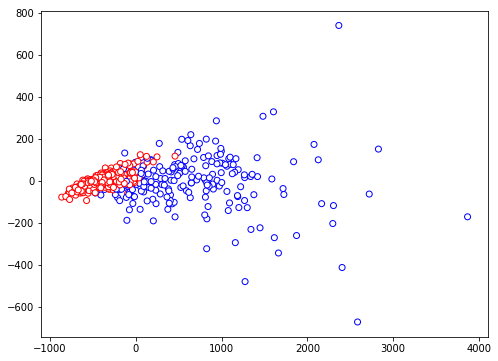

In [8]:
# 导入数据集
from sklearn import datasets
X,y = datasets.load_breast_cancer(return_X_y = True)

X_2dim = PCA(X, 2)
import matplotlib.pyplot as plt
import matplotlib
plt.figure(figsize=(8,6))
ec_list = ['b' if n==0 else 'r' for n in y]
plt.scatter(X_2dim[:,0],X_2dim[:,1],c = 'w', edgecolor = ec_list)
plt.show()
# 可以看见的是良性肿瘤(红色)的分布较为集中, 表现出高斯簇的形状, 而恶性肿瘤(兰色)则比较发散
# 所以我们可以把这个问题用二分类模型来解, 也可以用无监督的多维高斯模型构造异常检测系统

### PageRank
page rank是google在世纪初使用的搜索引擎技术, 它是一种结合了线性代数, 图论和数值计算的高效机器学习算法. 但究其原理其实并不复杂, 我们先构思一个图模型, 它的每个顶点是一个独立的网页. 这些网页之间被超链接互联, 从而让这个图模型是一个有向图. 这时我们就能给出一个假设, 网络中的用户流在顶点V时, 有等概率流向它的所有其他子顶点. 这样的假设建立了网页间的影响力关系线性方程组, 举个例子, 下面的网页图模型.
![page_graph.png](pics/page_graph.png)
也就是, 我们把每个顶点的分流因子1平均赋值到所有子结点, 形成一个nxn的矩阵M. 所有顶点的影响力满足线性方程组$Mx = x$
![transfer_matrix.png](pics/transfer_matrix.png)
解一个这样的线性方程组就能得到解x, 它就是所有网页的影响力值, 可以通过排序被用在网页的推荐上. 但是这样的解法是有一定问题的, 一个是效率的问题, 我们的网页数目通常会很多, 100k以上都是比较少的了, 这样的线性方程组的系统不适合直接求解, 而且即使直接解, 也不能保证解是唯一的. 因此我们一般使用带约束的迭代解法, 一般如下面的流程. 
1. 初始化x为一个$||x||_1 = 1$的向量
2. 迭代计算$x\leftarrow Mx$
3. x不再变化时, 停止迭代  

`这是不动点迭代的思想, 因为M的每一列的所有元素和为1, 迭代计算可以保证`$||x||_1 = 1$`始终成立, 而这样的迭代计算会让x向真正的解不断靠近直至收敛. 这个迭代次数一般不会太多, 所以这种解法能适用于有一定特殊性的本问题, 而且效率比RREF的方法高效得多`
这样的解法可行, 但是我们仍然会面临两个很重要的问题, 它们会让解变得无效化. 
1. 等级泄露（Rank Leak）：如果一个网页没有出链，就像是一个黑洞一样，吸收了其他网页的影响力而不释放，最终会导致其他网页的 PR 值为 0。
![pg_2.png](pics/pg_2.png)
2. 等级沉没（Rank Sink）：如果一个网页只有出链，没有入链（如下图所示），计算的过程迭代下来，会导致这个网页的 PR 值为 0
![pg_3.png](pics/pg_3.png)
为此我们可以引入一个合理的另一个假设, 我们假设在浏览网页时, 用户不会老老实实跟着超链接走下去, 很有可能看到一半感觉无聊了, 就随机跳到了一个另外的界面. 也就是, 我们引入这样的随机浏览因素, 把原来的M矩阵写成新的PR矩阵
$$ PR = (1-d)M+d \frac{Ones}{n} $$
这样的变化会让我们的计算收敛到一个有意义的解, 避免了无效解的产生

### 实例: 网页推荐
我们按照下面的网页连接状况进行建模, 并计算出网络影响力, 以此作为排序标准进行网页推荐. 
![page_rank.png](pics/page_rank.png)

In [4]:
hyperlinks = [
    (3, 0),
    (3, 1),
    (4, 3),
    (4, 1),
    (1, 2),
    (2, 1),
    (5, 1),
    (4, 5),
    (5, 4),
    (6, 1),
    (6, 4),
    (7, 1),
    (7, 4),
    (8, 1),
    (8, 4),
    (9, 4),
    (10, 4)
]
n = 11
hyperlinks = np.array(hyperlinks)
M = np.zeros((n,n))
M[hyperlinks[:,1],hyperlinks[:,0]] = 1
for i in range(n):
    if np.sum(M[:,i])>0:
        M[:,i] /= np.sum(M[:,i])

In [5]:
d = 0.173
PR = (1-d)*M + d*np.ones((n,n))/n
x = np.ones((n,1))/n
for iter in range(100):
    x = PR.dot(x)
    x /= np.sum(x)

x = x[:,0]
x *= 100
sorted_indices = np.argsort(-x)

for i in sorted_indices:
    name = chr(ord('A')+i)
    print("Page "+name+": Score: %4.1f"%(x[i]))

Page B: Score: 38.4
Page C: Score: 34.3
Page E: Score:  8.1
Page D: Score:  3.9
Page F: Score:  3.9
Page A: Score:  3.3
Page G: Score:  1.6
Page H: Score:  1.6
Page I: Score:  1.6
Page J: Score:  1.6
Page K: Score:  1.6
